In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import acquire, prepare
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
df = acquire.get_titanic_data()
# prepare the data
train, validate, test = prepare.prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape


((498, 10), (214, 10), (179, 10))

In [11]:
def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [12]:
baseline_accuracy = establish_baseline(y_train)

#### 1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [13]:
logit1 = LogisticRegression(C=1, 
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass and fare as only features
logit1.fit(X_train[['age', 'pclass', 'fare']], y_train)

# compute accuracy
train_accuracy = logit1.score(X_train[['age', 'pclass', 'fare']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.6947791164658634
Baseline Accuracy: 0.6164658634538153


#### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [14]:
logit2 = LogisticRegression(C=1,
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass, fare and sex_male as only features
logit2.fit(X_train[['age', 'pclass', 'fare', 'sex_male']], 
          y_train)

# compute accuracy
train_accuracy = logit2.score(X_train[['age', 'pclass', 'fare', 'sex_male']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7971887550200804
Baseline Accuracy: 0.6164658634538153


#### 3. Try out other combinations of features and models.

In [15]:
logit3 = LogisticRegression(C=1, 
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with all features
logit3.fit(X_train, y_train)

# compute accuracy
train_accuracy = logit3.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8072289156626506
Baseline Accuracy: 0.6164658634538153


In [16]:
logit4 = LogisticRegression(C=1, 
                           random_state=1349, 
                           intercept_scaling=1, 
                           solver='lbfgs'
                          )

# fit model with all features
logit4.fit(X_train, y_train)

# compute accuracy
train_acc4 = logit4.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc4}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8012048192771084
Baseline Accuracy: 0.6164658634538153


In [17]:
logit5 = LogisticRegression(C=1,
                            class_weight='balanced',
                            random_state=1349, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit5.fit(X_train, y_train)

# compute accuracy
train_acc5 = logit5.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc5}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7931726907630522
Baseline Accuracy: 0.6164658634538153


In [18]:
logit6 = LogisticRegression(C=0.1,
                            random_state=1349, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit6.fit(X_train, y_train)

# compute accuracy
train_acc6 = logit6.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc6}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8012048192771084
Baseline Accuracy: 0.6164658634538153


- My 3 best models are currently: logit4, logit5, logit6

#### 4. Use you best 3 models to predict and evaluate on your validate sample.

In [19]:
# use logit4 to make predictions for the X_validate observations
y_val_pred4 = logit4.predict(X_validate)
# compute accuracy
val_acc4 = logit4.score(X_validate, y_validate)

model4 = [4, train_acc4, val_acc4]


y_val_pred5 = logit5.predict(X_validate)
# compute accuracy
val_acc5 = logit5.score(X_validate, y_validate)

model5 = [5, train_acc5, val_acc5]


y_val_pred6 = logit6.predict(X_validate)
# compute accuracy
val_acc6 = logit6.score(X_validate, y_validate)

model6 = [6, train_acc6, val_acc6]

pd.DataFrame([model4, model5, model6], columns=['model', 'in-sample accuracy','out-of-sample accuracy'])

,model,in-sample accuracy,out-of-sample accuracy
0,4,0.801205,0.771028
1,5,0.793173,0.766355
2,6,0.801205,0.761682


#### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [20]:
y_test_pred = logit6.predict(X_test)
# compute accuracy
test_acc = logit6.score(X_test, y_test)

test_acc

0.7988826815642458

In [21]:
print('Coefficient: \n', logit6.coef_)
print('Intercept: \n', logit6.intercept_)

Coefficient: 
 [[ 8.90704986e-04 -3.42992930e-01 -3.53011710e-03 -1.47843977e-01
  -1.15474424e-01  7.80467054e-03 -1.70803002e-01 -1.79387952e+00
   2.41939253e-01  1.14820917e-01]]
Intercept: 
 [0.90719965]


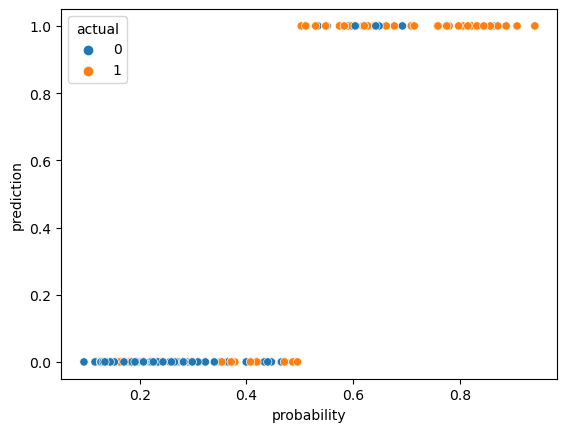

In [22]:
y_pred_proba = logit6.predict_proba(X_test)
# select the 2nd item in the array to get prob of survival (1)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

test_results = pd.DataFrame({'probability': y_pred_proba, 
                             'prediction': y_test_pred,
                             'actual': y_test})

sns.scatterplot(x='probability', y='prediction', 
                data=test_results, 
                hue='actual'
               )
plt.show()

- Accuracy is a little higher on test than on validate, and it is lower on test than train.

#### **Bonus1** How do different strategies for handling the missing values in the age column affect model performance?

#### **Bonus2** How do different strategies for encoding sex affect model performance?

#### **Bonus3** scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C
=
.01
,
.1
,
1
,
10
,
100
,
1000

#### **Bonus Bonus** how does scaling the data interact with your choice of C?